### AS.020.674 Fall 2015
### Lab 11
Due Dec 1 in lab. Submit your answers to Blackboard as either python scripts and associated figures or as a single working iPython notebook file.

In [1]:
# Standard iPython notebook preamble.
#%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
from pylab import *
matplotlib.rcParams.update({"axes.formatter.limits": (-3,3)})
plotStyles={"markersize":10,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}

## Introduction.

In this lab we will be running kinetic simulations of an individual single molecule undergoing a folding and unfolding reaction. We will save the time series data and analyze them to learn about the kintic rates.

We will model a single molecule folding and unfolding using two first order reactions:

1. U→F with rate constant $k_1$
2. F→U with rate constant $k_2$

Below is a Python script that simulates the kinetics of a single protein folding and unfolding.

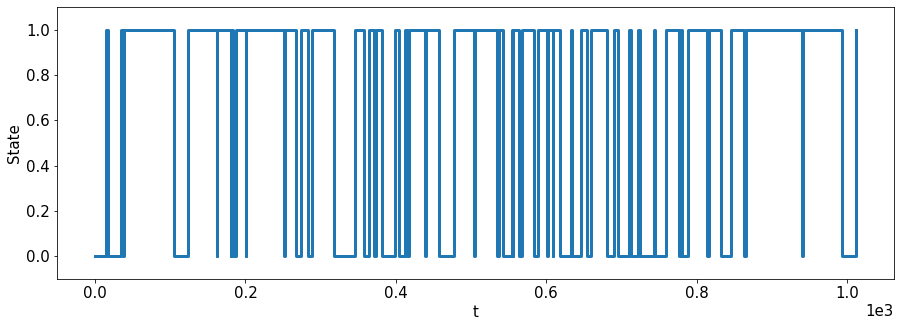

In [2]:
import numpy.random as rnd

k1=0.15
k2=0.07
ts=[0.0]   # a list of the times when a state change has occurred
states=[0] # state 0 is unfolded, state 1 is folded
tf=1000.0   # the final time of the simulation
while (ts[-1]<tf):
    
    # If we are in the unfolded state, figure out when the molecule transitions to the folded state.
    if states[-1] == 0:
        ts.append(ts[-1]+rnd.exponential(1/k1))
        states.append(1)
        
    # If we are in the folded state, figure out when the molecule transitions to the unfolded state.
    else:
        ts.append(ts[-1]+rnd.exponential(1/k2))
        states.append(0)

matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,5)})
step(ts,states, **stepStyles)
xlabel('t'); ylim([-0.1,1.1]); ylabel('State');

Read through and try to understand the code above. Save the script to a file and make sure you can run it, you may need to adjust the plotting code for your preferred plotting method.

## Problem 1

Run a folding simulation for 1000 seconds. Create a list of waiting times (the time between transitions) in both the folded and unfolded state. Use the np.histogram function to calculate a histogram of the waiting times for both states, using 20 bins.

1. Plot the two histograms as bar plots. Hint: the np.histogram function returns the bin edges, you will want to plot the bars located at the bin centers. Hint 2: for n bins there will be n+1 edges and n centers.

[0.0, 5.120488900350024, 12.84168752904468, 18.334675801878525, 41.156140285335105, 41.29515113793627, 51.23849276382495, 58.964678387375905, 118.7749708877594, 128.37470511452366, 141.8305328279409, 144.37896970154517, 146.42221268377108, 150.5742550197345, 156.18215963902594, 158.12691457956745, 191.98861287627616, 194.03611175305113, 197.21480848855862, 197.4959518724858, 199.90989475124059, 216.8089768911516, 219.6920426678527, 246.06318736956666, 246.66804552699432, 261.1057177409795, 262.267236064118, 266.5483964828969, 270.0182161522958, 271.0016934739358, 272.0927486822236, 272.9827907993808, 274.22833197515394, 289.95154010747893, 327.7304888714332, 330.7670179662052, 355.134063709439, 369.1339731908574, 376.62395888095506, 399.2191099132125, 413.35483411899133, 416.3491688706218, 437.2638468891127, 439.8704369817359, 440.04911045246917, 446.7988286312701, 505.48185141183075, 505.78569384290125, 508.1005387257197, 515.0649316712714, 524.5671685908662, 531.1167367940066, 538.58

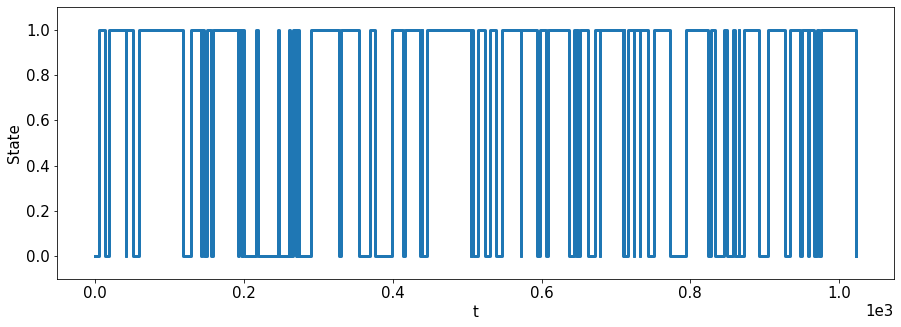

In [3]:
#copy above code and add a line that allows to find delta T

import numpy.random as rnd
time_unfolded=[]
time_folded=[]
k1=0.15
k2=0.07
ts=[0.0]   # a list of the times when a state change has occurred
states=[0] # state 0 is unfolded, state 1 is folded
tf=1000.0   # the final time of the simulation
while (ts[-1]<tf):
   
    # If we are in the unfolded state, figure out when the molecule transitions to the folded state.
    if states[-1] == 0:
        ts.append(ts[-1]+rnd.exponential(1/k1))
        states.append(1)
        time_unfolded.append(ts[-2])
        time_unfolded.append(ts[-1])
        
    # If we are in the folded state, figure out when the molecule transitions to the unfolded state.
    else:
        ts.append(ts[-1]+rnd.exponential(1/k2))
        states.append(0)
        time_folded.append(ts[-2])
        time_folded.append(ts[-1])

matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,5)})
step(ts,states, **stepStyles)
xlabel('t'); ylim([-0.1,1.1]); ylabel('State');
print(ts)
#print(states)

# print(time_unfolded)
# print(time_folded)

# print(len(time_unfolded))
# print(len(time_folded))

ts_even = ts[0:][::2]
ts_odd = ts[1:][::2]

#print(ts_even)
#print(ts_odd)
unfolded_wait_times = [ts[i]-ts[i-1] for i in range(1, len(ts),2)]
print(unfolded_wait_times)
#print(len(ts))
#print(len(unfolded_wait_times))

#list(np.array(ts_odd) - np.array(ts_even))


folded_wait_times = [ts[i]-ts[i-1] for i in range(2, len(ts),2)]
print(folded_wait_times)



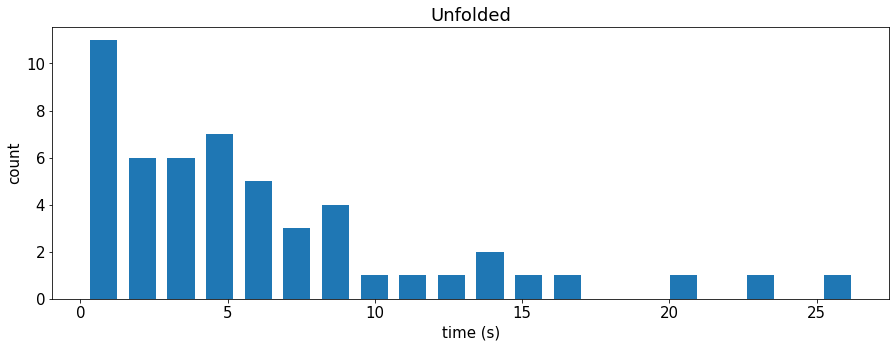

[11  6  6  7  5  3  4  1  1  1  2  1  1  0  0  1  0  1  0  1]


In [10]:
import matplotlib.pyplot as plt

hist, bins = np.histogram(unfolded_wait_times, bins=20)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title('Unfolded')
plt.xlabel('time (s)')
plt.ylabel('count')
plt.show()
counts_unfold, bin_edges = np.histogram(unfolded_wait_times, bins=20)
print(counts_unfold)
sum_unfold = np.sum(counts_unfold)
unfold_width = bin_edges[1] - bin_edges[0]
div_unfold = sum_unfold*unfold_width
pdf_unfold = [x /div_unfold  for x in counts_unfold]

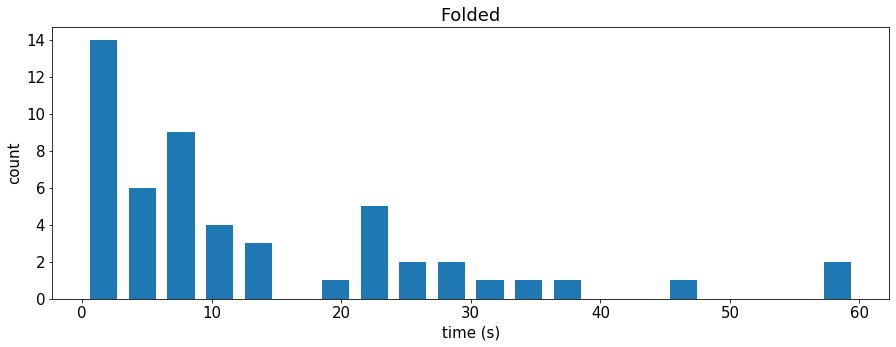

[14  6  9  4  3  0  1  5  2  2  1  1  1  0  0  1  0  0  0  2]


In [6]:
import matplotlib.pyplot as plt

hist, bins = np.histogram(folded_wait_times, bins=20)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title('Folded')
plt.xlabel('time (s)')
plt.ylabel('count')
plt.show()
counts_fol, bin_edges = np.histogram(folded_wait_times, bins=20)
sum_folded = np.sum(counts_fol)
fol_width = bin_edges[1] - bin_edges[0]
div_folded = sum_folded*fol_width
pdf_fol = [x /div_folded  for x in counts_fol]

## Problem 2
The histogram function returns the number of counts in each bin. To compare with our kinetics equations, we need to convert the counts into a probability density function (PDF). To do so, divide the histogram counts by the sum of all the counts and also by the width of the bin. The bins are all the same size by default, so you can divide each count by the width of the first bin.

1. Plot the calculated PDFs for the folding and unfolding transition times as a bar plot.
2. On top of the bar plots, plot the PDF for an exponential distribution: $p(t)=k{\cdot}e^{-k{\cdot}t}$, where $k$ is $k_1$ or $k_2$ as appropriate.

## Problem 3
Write a python script to fit your calculated PDFs to exponential distributions to estimate $k_1$ and $k_2$.

1. Plot the calculated PDFs as bar plots overlaid with the best fit estimates.
2. What is the relative error in your estimated $k_1$ and $k_2$ vs the actual $k_1$ and $k_2$?
3. Change the time of the simulation to 10000 seconds and run the analysis again. Now what are the estimated errors in $k_1$ and $k_2$?